In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Importing the Dataset2

In [2]:
data2 = pd.read_csv("weatherAUS.csv")
data2.dropna(inplace=True)
data2['Tommorow_Rain'] = np.where(data2['RainTomorrow']=='Yes', '1', '0')
data2['Today_Rain'] = np.where(data2['RainToday']=='Yes', '1', '0')

data2=data2.sample(40000,random_state=42)

train_data, test_data = train_test_split(data2, test_size = 0.3, random_state = 20)
y_train=train_data['Tommorow_Rain']
y_test=test_data['Tommorow_Rain']
x_train=train_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Today_Rain']]
x_test=test_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Today_Rain']]

# Feature Scaling

In [3]:
Scale_Train = preprocessing.StandardScaler().fit(x_train[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Today_Rain']])
X_train = Scale_Train.transform(x_train[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Today_Rain']])

Scale_Test = preprocessing.StandardScaler().fit(x_test[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Today_Rain']])
X_test = Scale_Test.transform(x_test[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Today_Rain']])

# K-Means Clustering Algorithm 

[[10825 11020]
 [ 3865  2290]]
0.46839285714285717


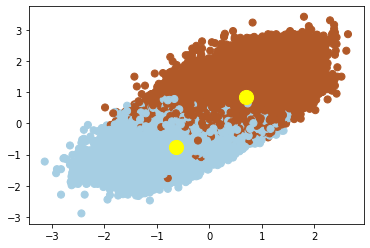

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X_train)
y=np.array(y_train)
y=y.astype(float)
j = 0
predict2=[]
for i in range(len(X_train)):
    predict_rain = np.array(X_train[i].astype(float))
    predict_rain = predict_rain.reshape(-1, len(predict_rain))
    predict2.append(kmeans.predict(predict_rain))
    if predict2[i] == y[i]:
        j += 1

yp=kmeans.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=yp, s=50, cmap=plt.cm.Paired)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='Yellow', s=200)
print(confusion_matrix(y,yp))
print(accuracy_score(y,yp))

[[4627 4742]
 [1593 1038]]
0.47208333333333335


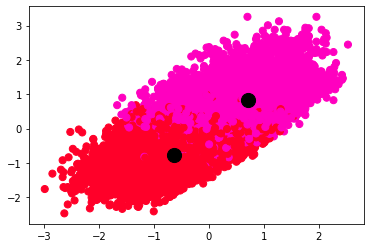

In [35]:
y=np.array(y_test)
y=y.astype(float)
k = 0
predict3=[]
for i in range(len(X_test)):
    predict_rain1 = np.array(X_test[i].astype(float))
    predict_rain1 = predict_rain1.reshape(-1, len(predict_rain1))
    predict3.append(kmeans.predict(predict_rain1))
    if predict3[i] == y[i]:
        k += 1

yp2=kmeans.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=yp2, s=50, cmap='gist_rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='Black', s=200)
print(confusion_matrix(y,yp2))
print(accuracy_score(y,yp2))

# Feature Selection - Forward Selection

In [6]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=12,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=2)
features = feature_selector.fit(X_train,y_train)
filtered_features= x_train.columns[list(features.k_feature_idx_)]  
filtered_features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.0s finished

[2020-04-24 19:45:32] Features: 1/12 -- score: 0.806182768648157[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    9.1s finished

[2020-04-24 19:45:41] Features: 2/12 -- score: 0.8128810401783664[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    8.6s finished

[2020-04-24 19:45:50] Features: 3/12 -- score: 0.8065845636963377[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

Index(['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Today_Rain'],
      dtype='object')

# Principal Component Analysis (PCA)

In [7]:
x=x_train[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Today_Rain']]
xt=x_test[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Today_Rain']]
x= preprocessing.StandardScaler().fit_transform(x)
xt= preprocessing.StandardScaler().fit_transform(xt)
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca_train =pca.fit_transform(x)
pca_test=pca.fit_transform(xt)

# Independent Component Analysis (ICA)

In [8]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6)
ica_train =ica.fit_transform(x)
ica_test=ica.fit_transform(xt)

# Randomized Projection

In [9]:
from sklearn.random_projection import GaussianRandomProjection
rca = GaussianRandomProjection(n_components=6, eps=0.1, random_state=42)
rca_train =rca.fit_transform(x)
rca_test=rca.fit_transform(xt)

# K - Means Clustering using PCA

0.6613214285714286


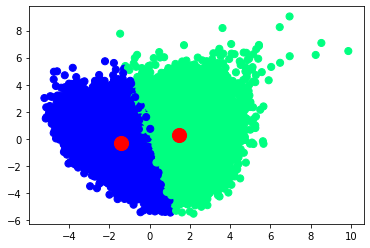

In [36]:
kmeans.fit(pca_train)
y=np.array(y_train)
y=y.astype(float)
l = 0
predict4=[]
for i in range(len(pca_train)):
    predict_rain4 = np.array(pca_train[i].astype(float))
    predict_rain4 = predict_rain4.reshape(-1, len(predict_rain4))
    predict4.append(kmeans.predict(predict_rain4))
    if predict4[i] == y[i]:
        l += 1
yp=kmeans.predict(pca_train)
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=yp, s=50, cmap='winter')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200)
print(accuracy_score(y,yp))

0.4495


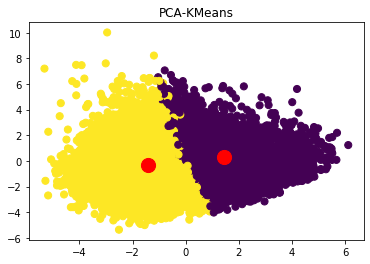

In [37]:
y=np.array(y_test)
y=y.astype(float)
m = 0
predict5=[]
for i in range(len(pca_test)):
    predict_rain5 = np.array(pca_test[i].astype(float))
    predict_rain5 = predict_rain5.reshape(-1, len(predict_rain5))
    predict5.append(kmeans.predict(predict_rain5))
    if predict5[i] == y[i]:
        m += 1
yp=kmeans.predict(pca_test)
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=yp, s=50, cmap='viridis_r')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200)
plt.title('PCA-KMeans')
print(accuracy_score(y,yp))

# K - Means Clustering using ICA

0.3871428571428571


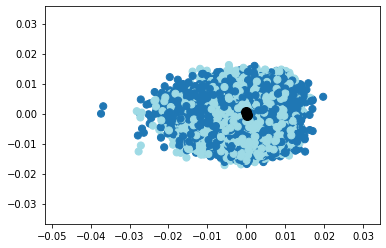

In [38]:
kmeans.fit(ica_train)
y=np.array(y_train)
y=y.astype(float)
n = 0
predict6=[]
for i in range(len(ica_train)):
    predict_rain6 = np.array(ica_train[i].astype(float))
    predict_rain6 = predict_rain6.reshape(-1, len(predict_rain6))
    predict6.append(kmeans.predict(predict_rain6))
    if predict6[i] == y[i]:
        n += 1
yp=kmeans.predict(ica_train)
plt.scatter(ica_train[:, 0], ica_train[:, 1], c=yp, s=50, cmap='tab20')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='Black', s=100)
print(accuracy_score(y,yp))

0.3884166666666667


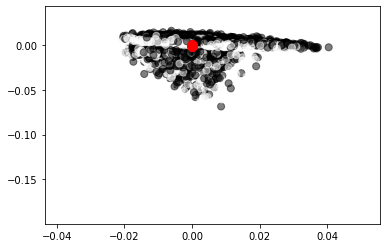

In [39]:
y=np.array(y_test)
y=y.astype(float)
p = 0
predict7=[]
for i in range(len(ica_test)):
    predict_rain7 = np.array(ica_test[i].astype(float))
    predict_rain7 = predict_rain7.reshape(-1, len(predict_rain7))
    predict7.append(kmeans.predict(predict_rain7))
    if predict7[i] == y[i]:
        p += 1
yp=kmeans.predict(ica_test)
plt.scatter(ica_test[:, 0], ica_test[:, 1], c=yp, s=50, cmap='cubehelix', alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
print(accuracy_score(y,yp))

# K-Means Clustering using RCA

0.7782857142857142


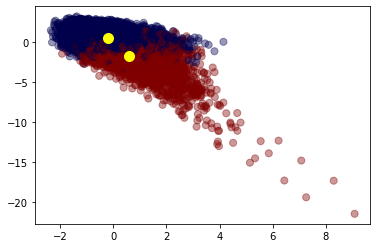

In [40]:
kmeans.fit(rca_train)
y=np.array(y_train)
y=y.astype(float)
q = 0
predict8=[]
for i in range(len(rca_train)):
    predict_rain8 = np.array(rca_train[i].astype(float))
    predict_rain8 = predict_rain8.reshape(-1, len(predict_rain8))
    predict8.append(kmeans.predict(predict_rain8))
    if predict8[i] == y[i]:
        q += 1
yp=kmeans.predict(rca_train)
plt.scatter(rca_train[:, 0], rca_train[:, 1], c=yp, s=50, cmap='seismic',alpha=0.4)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='Yellow', s=100)
print(accuracy_score(y,yp))

0.7803333333333333


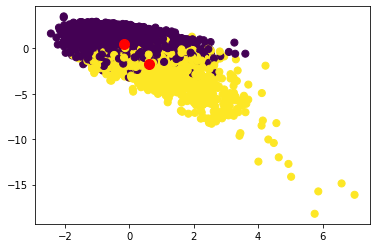

In [41]:
y=np.array(y_test)
y=y.astype(float)
r = 0
predict9=[]
for i in range(len(rca_test)):
    predict_rain9 = np.array(rca_test[i].astype(float))
    predict_rain9 = predict_rain9.reshape(-1, len(predict_rain9))
    predict9.append(kmeans.predict(predict_rain9))
    if predict9[i] == y[i]:
        r += 1
yp=kmeans.predict(rca_test)
plt.scatter(rca_test[:, 0], rca_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
print(accuracy_score(y,yp))

# Neural Networks with PCA

In [17]:
input_shape=6
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'selu', input_shape =(input_shape,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'selu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'selu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(pca_train, y_train, batch_size = 10, epochs = 10)
y_predict = classifier.predict(pca_test)
y_predict = np.where(y_predict > 0.5,1,0)
y_test_array=np.array(y_test)
y_test_array= y_test_array.astype(float)
print(confusion_matrix(y_test_array,y_predict))  
print(classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print(acc_score)
y_predict_train=classifier.predict(pca_train)
y_predict_train = np.where(y_predict_train > 0.5,1,0)
y_train_array=np.array(y_train)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/10
28000/28000 [==============================] - 7s 236us/step - loss: 0.3882 - accuracy: 0.8319
Epoch 2/10
28000/28000 [==============================] - 6s 224us/step - loss: 0.3739 - accuracy: 0.8332
Epoch 3/10
28000/28000 [==============================] - 6s 227us/step - loss: 0.3730 - accuracy: 0.8353
Epoch 4/10
28000/28000 [==============================] - 6s 225us/step - loss: 0.3722 - accuracy: 0.8356
Epoch 5/10
28000/28000 [==============================] - 6s 222us/step - loss: 0.3720 - accuracy: 0.8359
Epoch 6/10
28000/28000 [==============================] - 6s 227us/step - loss: 0.3720 - accuracy: 0.8359
Epoch 7/10
28000/28000 [==============================] - 6s 228us/step - loss: 0.3715 - accuracy: 0.8363
Epoch 8/10
28000/28000 [==============================] - 6s 229us/step - loss: 0.3713 - accuracy: 0.8340
Epoch 9/10
28000/28000 [==============================] - 6s 230us/step - loss: 0.3712 - accuracy: 0.8339
Epoch 10/10
28000/28000 [=====================

# Train and Test Accuracy for various Models of K-Means

Text(0.5, 1.0, 'Train and Test Accuracy for various Models of K-Means')

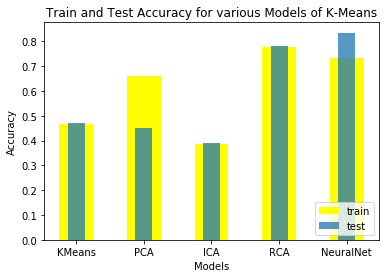

In [43]:
train_accuracy = [0.4683,0.6613,0.3871,0.7782,0.7331]
test_accuracy=[0.472,0.4495,0.3884,0.7803,0.8348]
Models =['KMeans','PCA','ICA','RCA','NeuralNet']
plt.bar(Models,train_accuracy,label='train',width=0.5,color='Yellow')
plt.bar(Models,test_accuracy,label='test',width=0.25,alpha = 0.75)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Models of K-Means")

# Expectation Maximization

[[10168 11677]
 [ 2498  3657]]
0.49375


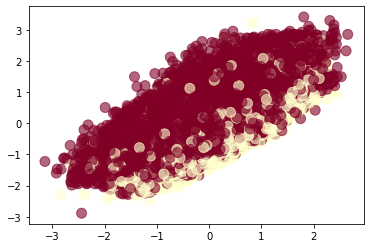

In [19]:
from sklearn.mixture import GaussianMixture
y=np.array(y_train)
y=y.astype(float)
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(X_train)
em_pred = em.predict(X_train)
em_probs = em.predict_proba(X_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=100, cmap='YlOrRd_r',alpha = 0.6)

[[4325 5044]
 [1123 1508]]
0.4860833333333333


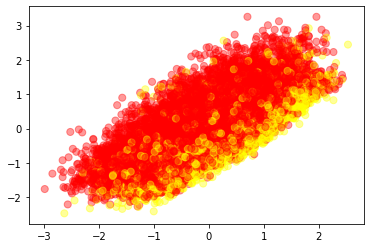

In [20]:
y=np.array(y_test)
y=y.astype(float)
em_predict = em.predict(X_test)
em_prob = em.predict_proba(X_test)
print(confusion_matrix(y,em_predict))
print(accuracy_score(y,em_predict))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y, s=50, cmap='autumn',alpha =0.4)

# Analysis of PCA data

[[10492 11353]
 [ 2802  3353]]
0.4944642857142857


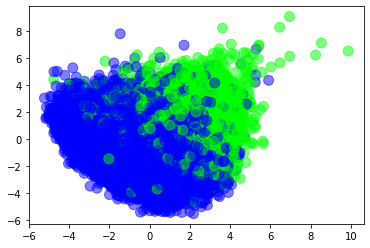

In [21]:
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(pca_train)
em_pred = em.predict(pca_train)
em_probs = em.predict_proba(pca_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y, s=100, cmap='brg',alpha = 0.5)

[[5384 3985]
 [ 398 2233]]
0.63475


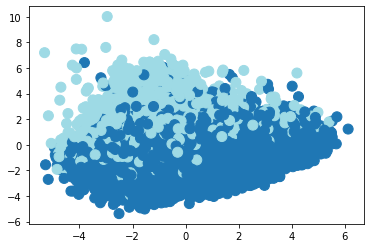

In [22]:
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(pca_test)
em_probs = em.predict_proba(pca_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=y, s=100, cmap='tab20')

# Analysis of ICA data

[[19562  2283]
 [ 3676  2479]]
0.7871785714285714


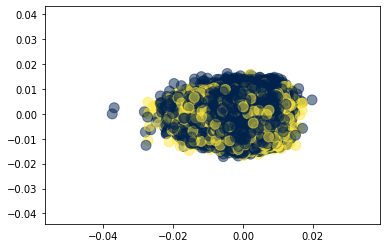

In [23]:
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(ica_train)
em_pred = em.predict(ica_train)
em_probs = em.predict_proba(ica_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(ica_train[:, 0], ica_train[:, 1], c=y, s=100, cmap='cividis', alpha = 0.5)

[[7817 1552]
 [1618 1013]]
0.7358333333333333


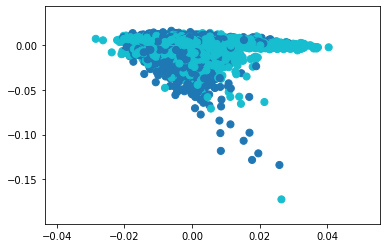

In [24]:
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(ica_test)
em_probs = em.predict_proba(ica_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(ica_test[:, 0], ica_test[:, 1], c=y, s=50, cmap='tab10_r')

# Analysis of RCA data

[[18583  3262]
 [ 3339  2816]]
0.76425


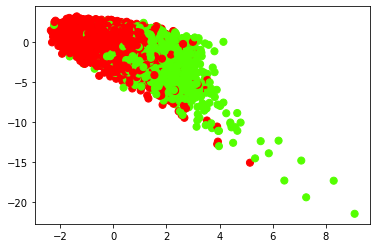

In [25]:
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(rca_train)
em_pred = em.predict(rca_train)
em_probs = em.predict_proba(rca_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(rca_train[:, 0], rca_train[:, 1], c=y, s=50, cmap='prism')

[[7960 1409]
 [1419 1212]]
0.7643333333333333


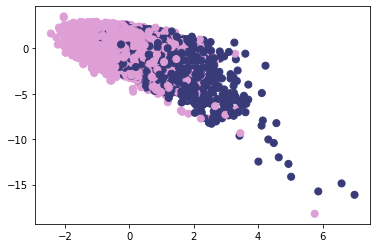

In [26]:
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(rca_test)
em_probs = em.predict_proba(rca_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(rca_test[:, 0], rca_test[:, 1], c=y, s=50, cmap='tab20b_r')

# Train and Test Accuracy for various Models for Expectation Maximization

Text(0.5, 1.0, 'Train and Test Accuracy for various Models for Expectation Maximization')

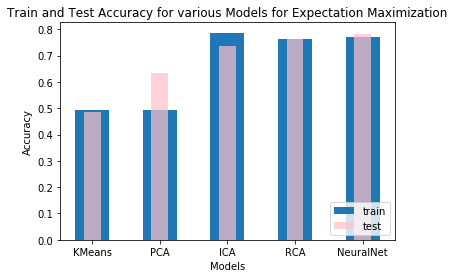

In [45]:
train_accuracy = [0.4937,0.4944,0.7871,0.7642,0.7697]
test_accuracy=[0.486,0.6347,0.735,0.7643,0.7827]
Models =['KMeans','PCA','ICA','RCA','NeuralNet']
plt.bar(Models,train_accuracy,label='train',width=0.5)
plt.bar(Models,test_accuracy,label='test',width=0.25,color = 'Pink',alpha = 0.7)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Models for Expectation Maximization")

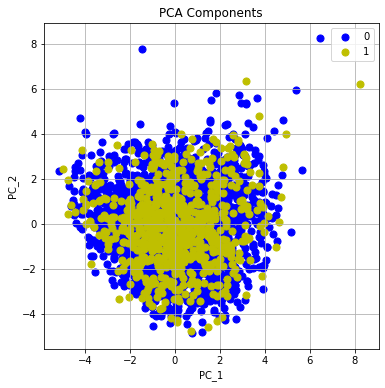

In [28]:
principalDf = pd.DataFrame(data = pca_train
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])
finalDf=pd.concat([principalDf, y_train], axis = 1)
finalDf=finalDf.fillna(1)
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_title('PCA Components')
targets = ['0','1']
colors = ['b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Tommorow_Rain'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Neural Network Analysis with features from KMeans & Expectation Maximization

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_train)
kmeans=kmeans.predict(pca_train)
em.fit(pca_train)
probs_em=em.predict_proba(pca_train)
new = pd.DataFrame()
dataframe1 = pd.DataFrame({"KM_Pred": kmeans,"EM_Prob": probs_em[:,0],"y": y_train})
new=new.append(dataframe1)

In [30]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_test)
kmeans1=kmeans.predict(pca_test)
em.fit(pca_test)
probs_em1=em.predict_proba(pca_test)
new1 = pd.DataFrame()
dataframe2 = pd.DataFrame({"KM_Pred": kmeans1,"EM_Prob": probs_em1[:,0],"y": y_test})
new1 = new.append(dataframe2)

In [31]:
trainy=new.drop(columns=['KM_Pred','EM_Prob'],axis=1)
trainy=np.array(trainy)
trainy=trainy.astype(float)
testy=new1.drop(columns=['KM_Pred','EM_Prob'],axis=1)
testy=np.array(testy)
testy=testy.astype(float)

In [32]:
trainx=new.drop(columns=['y'],axis=1)
trainx=np.array(trainx)
trainx=trainx.astype(float)
testx=new1.drop(columns=['y'],axis=1)
testx=np.array(testx)
testx=testx.astype(float)

In [33]:
input_shape1=2
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'selu', input_shape =(input_shape1,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'selu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'selu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(trainx, trainy, batch_size = 10, epochs = 10)
y_predict = classifier.predict(testx)
y_predict = np.where(y_predict > 0.5,1,0)
y_test_array= np.array(testy)
y_test_array= y_test_array.astype(float) 
print(classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print(acc_score)
y_predict_train=classifier.predict(trainx)
y_predict_train = np.where(y_predict_train > 0.5,1,0)
y_train_array=np.array(trainy)
y_train_array= y_train_array.astype(float) 
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/10
28000/28000 [==============================] - 7s 245us/step - loss: 0.4589 - accuracy: 0.7802
Epoch 2/10
28000/28000 [==============================] - 6s 228us/step - loss: 0.4407 - accuracy: 0.7820
Epoch 3/10
28000/28000 [==============================] - 6s 226us/step - loss: 0.4405 - accuracy: 0.7811
Epoch 4/10
28000/28000 [==============================] - 6s 227us/step - loss: 0.4402 - accuracy: 0.7814
Epoch 5/10
28000/28000 [==============================] - 5s 187us/step - loss: 0.4402 - accuracy: 0.7816
Epoch 6/10
28000/28000 [==============================] - 5s 191us/step - loss: 0.4401 - accuracy: 0.7819
Epoch 7/10
28000/28000 [==============================] - 6s 215us/step - loss: 0.4402 - accuracy: 0.7807
Epoch 8/10
28000/28000 [==============================] - 6s 219us/step - loss: 0.4400 - accuracy: 0.7807
Epoch 9/10
28000/28000 [==============================] - 6s 220us/step - loss: 0.4398 - accuracy: 0.7812
Epoch 10/10
28000/28000 [=====================